In [87]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import atlas_mpl_style
import numpy as np
atlas_mpl_style.use_atlas_style()

In [111]:
vals = {
    'Direct': {
        'HL-LHC': [1.7, 'ATL-PHYS-PUB-2018-021'],
        'FCC-hh': [10.8, 'CERN-ACC-2018-0056'],
        'ILC': [0.25, '$\\sqrt{s}/2$'],
        'CLIC': [1.5, '$\\sqrt{s}/2$'],
    },
    '3-body': {
        'HL-LHC': [0.85, 'ATL-PHYS-PUB-2018-021'],
        'FCC-hh': [10, 'CERN-ACC-2018-0056'],
    },
    '4-body': {
        'HL-LHC': [0.95, 'ATL-PHYS-PUB-2018-021'],
        'FCC-hh': [5, 'CERN-ACC-2019-0036'],
    },
    'Precision\nHiggs': {
        'FCC-ee': [1, '1707.03399'],
        'CEPC': [0.8, '1707.03399'],
    },
}

cmap = mcm.get_cmap('Set3')

colors = {
    'HL-LHC': cmap(0),
    'FCC-hh': cmap(7),
    'FCC-ee': cmap(2),
    'ILC': cmap(3),
    'CLIC': cmap(4),
    'CEPC': cmap(5),
}

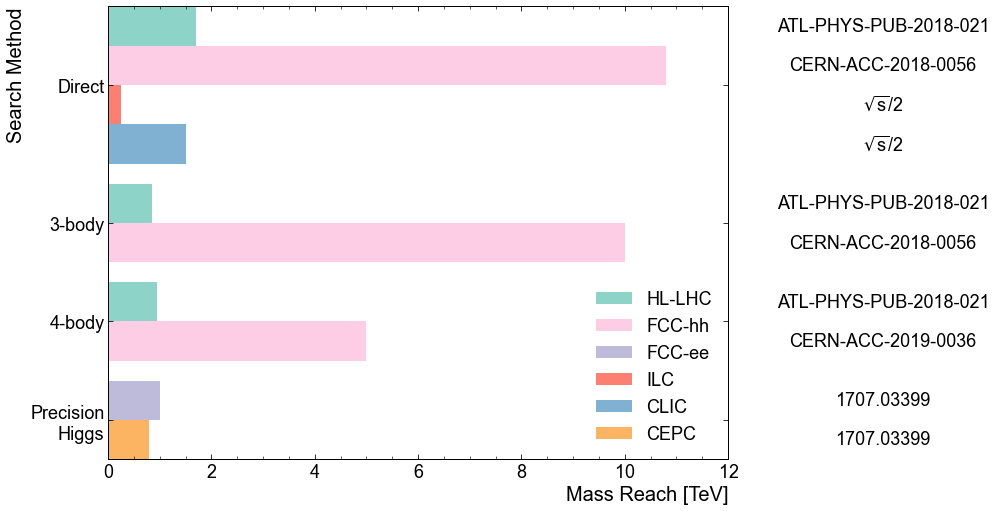

In [112]:
fig, ax = plt.subplots()

bar_height = 1
group_pad = 0.5

y = 0
ys = []
labels = []
label_ys = []
widths = []
color = []
references = []
legend_indexes = {} # index into bars.patches
for group,v in vals.items():
    y_group_start = y
    for item,val in v.items():
        widths.append(val[0])
        references.append(val[1])
        ys.append(y)
        color.append(colors[item])
        legend_indexes.setdefault(item, len(ys) - 1)
        y += bar_height
    labels.append(group)
    label_ys.append((y + y_group_start) / 2)
    y += group_pad

bars = ax.barh(ys, widths, color=color, height=bar_height, align='edge')
ax.set_yticks(label_ys, labels)
ax.tick_params(axis='y', which='minor', left=False, right=False)
ax.set_ylim(0, ys[-1] + bar_height)
ax.invert_yaxis()
atlas_mpl_style.set_xlabel("Mass Reach [TeV]")
atlas_mpl_style.set_ylabel("Search Method")

x0,x1 = ax.get_xlim()
for y,ref in zip(ys, references):
    ax.text(x1 + 3, y + bar_height/2, ref, va='center', ha='center')

legend_patches = []
legend_labels = []
for k,_ in colors.items():
    legend_patches.append(bars.patches[legend_indexes[k]])
    legend_labels.append(k)
ax.legend(legend_patches, legend_labels)


In [95]:
cmap(2)

(0.7450980392156863, 0.7294117647058823, 0.8549019607843137, 1.0)